In [1]:
%load_ext autoreload
%autoreload 2

from src import *

m = lambda s: s * 60
h = lambda s: s * 3600

No module named 'gurobipy'


In [3]:
file = '07_RX100'
uuid = '042_large_dataset_1000/0'
model_name = 'rvce'

model, config = load_model_locally(uuid, model_name=model_name, device='cuda:1')
video = Video(file, config)

from_time, till_time = video.get_from_till_time(Part.WHOLE)
# from_time, till_time = 0, m(10)

# predictions, probabilities = {'n_counts': None}, {'n_counts': None}
predictions, probabilities = validate_video(video, model, from_time=from_time, till_time=till_time, return_probs=True, tqdm=tqdm)
labels = get_labels(video, from_time, till_time)

  0%|          | 0/222 [00:00<?, ?it/s]

In [4]:
predictions['n_counts'].sum(), len(predictions['n_counts']) * 6

(136, 1332)

00:00 - 22:12


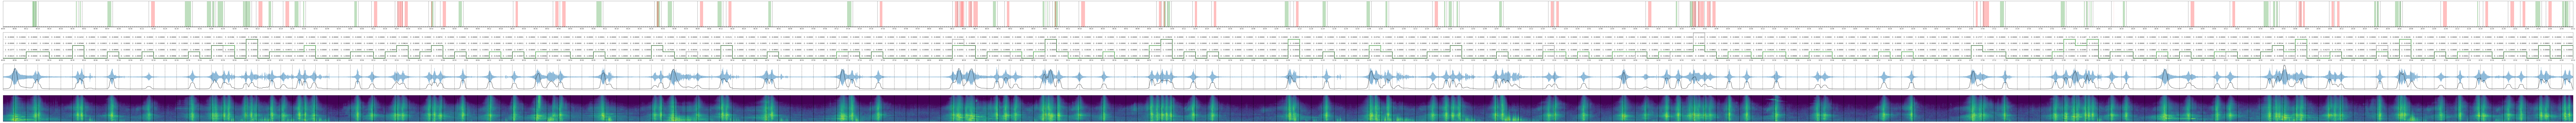

In [5]:
show(
    config,
    signal=video.signal,
    best_detection_frame=None, 
    predictions=predictions['n_counts'],
    probabilities=probabilities['n_counts'],
    events_start_time=video.events_start_time,
    events_end_time=video.events_end_time,
    events=video.events,
    views=video.views,
    from_time=from_time,
    till_time=till_time,
    # save='plots/visualization.png',
    # plot_true_features=True,
    # width_multiplier=1
)
set_plt_png()
show_video(file)

pred: 136 	 true: 109 	 rvce: 0.248


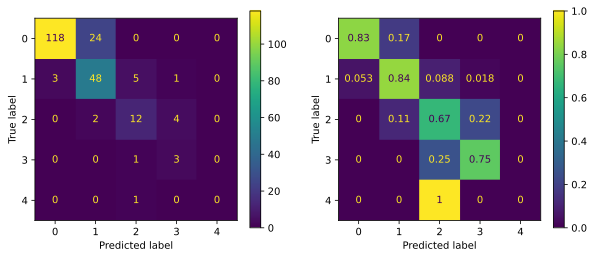

In [7]:
set_plt_svg()
plot_confusion_matrix(labels['n_counts'], predictions['n_counts'])

In [ ]:
dataset_name = '014_eyedea_september'

dataset_path = f'config/dataset/{dataset_name}.yaml'
uuid = '036_aligned_resized_128_audio_image_augmentation_bs_256/0'

with open(dataset_path, 'r') as stream:
    files = yaml.safe_load(stream)

for i, file in enumerate(files):
    print(file)
    
    config = load_config_locally(uuid)
    video = Video(file, config)
    from_time, till_time = video.get_from_till_time(Part.WHOLE)

    pieces = math.ceil(till_time / m(20))
    for piece in range(1, pieces + 1):
        till_time = m(piece * 20)
    
        show(
            config,
            signal=video.signal,
            best_detection_frame=None, 
            predictions=None,
            probabilities=None,
            events_start_time=video.events_start_time,
            events_end_time=video.events_end_time,
            events=video.events,
            views=video.views,
            from_time=from_time,
            till_time=till_time,
            # save=False,
            save=f'plots/dataset_visualization_{dataset_name}/{video.file}_{piece}.jpeg',
            # plot_true_features=True
        )

        from_time = till_time